In [5]:
import pandas as pd
from pathlib import Path

# 1. Define the base directory (the root of your project: NovaFin-Sentiment)
# We go up one level from the notebook's current directory.
base_dir = Path.cwd().parent 

# 2. Construct the file path absolutely, including the 'data' subfolder
# The full path is: NovaFin-Sentiment / data / yfinance_data / AAPL.csv
file_path = base_dir / 'data' / 'yfinance_data' / 'AAPL.csv'

# --- Check the path before loading ---
print(f"Constructed file path: {file_path}")

# Load the data
try:
    aapl_df = pd.read_csv(file_path)

    # Convert the 'Date' column to a datetime object and set it as the index
    aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
    aapl_df.set_index('Date', inplace=True)

    # --- SUCCESS OUTPUT ---
    print("\nAAPL Stock Data Loaded Successfully! 🎉")
    print(f"Number of rows: {len(aapl_df)}")
    print("\nDataFrame Head:")
    print(aapl_df.head())
    print("\nDataFrame Info:")
    aapl_df.info()

except FileNotFoundError:
    # This should not happen now, but provides a final error check
    print("\nFATAL ERROR: File still not found. Check the full path name.")
    print(f"Expected path was: {file_path.resolve()}")

Constructed file path: c:\Users\Mer\NovaFin-Sentiment\data\yfinance_data\AAPL.csv

AAPL Stock Data Loaded Successfully! 🎉
Number of rows: 3774

DataFrame Head:
               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  

In [6]:
#  Calculate Basic Technical Indicators

import numpy as np
import talib

# --- 1. Calculate Simple Moving Average (SMA) ---
# Use the Close price for the 20-day SMA.
# This indicator helps smooth price data and identify the current trend.
aapl_df['SMA_20'] = talib.SMA(aapl_df['Close'], timeperiod=20)

# --- 2. Calculate Relative Strength Index (RSI) ---
# RSI is a momentum oscillator that measures the speed and change of price movements.
# A common period is 14 days. Values usually range from 0 to 100.
aapl_df['RSI_14'] = talib.RSI(aapl_df['Close'], timeperiod=14)

# --- Display Results ---
print("Technical Indicators Calculated Successfully!")
print("\nDataFrame Tail (showing new columns):")
print(aapl_df.tail())

# Check the data types again
print("\nDataFrame Info:")
aapl_df.info()

Technical Indicators Calculated Successfully!

DataFrame Tail (showing new columns):
                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600   
2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300   
2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700   
2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900   
2023-12-29  190.728775  192.581275  189.936256  192.085953  42672100   

                SMA_20     RSI_14  
Date                               
2023-12-22  191.856618  54.672784  
2023-12-26  192.018094  53.090049  
2023-12-27  192.154308  53.354446  
2023-12-28  192.362839  54.540999  
2023-12-29  192.490633  51.121347  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column  Non-

In [7]:
# Cell 3: Calculate MACD and Signal Line

# MACD typically uses three time periods: 
# 12-period EMA (Fast), 26-period EMA (Slow), and 9-period EMA of the difference (Signal Line).
aapl_df['MACD'], aapl_df['MACD_Signal'], aapl_df['MACD_Hist'] = talib.MACD(
    aapl_df['Close'], 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

# --- Display Results ---
print("MACD Indicator Calculated Successfully!")
print("\nDataFrame Tail (showing all indicators):")
print(aapl_df.tail())

MACD Indicator Calculated Successfully!

DataFrame Tail (showing all indicators):
                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600   
2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300   
2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700   
2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900   
2023-12-29  190.728775  192.581275  189.936256  192.085953  42672100   

                SMA_20     RSI_14      MACD  MACD_Signal  MACD_Hist  
Date                                                                 
2023-12-22  191.856618  54.672784  2.633141     3.235256  -0.602115  
2023-12-26  192.018094  53.090049  2.304751     3.049155  -0.744404  
2023-12-27  192.154308  53.354446  2.029104     2.845145  -0.816041  
2023-12-28  192.362839  54.540999  1.823998     2.640915  -0.81

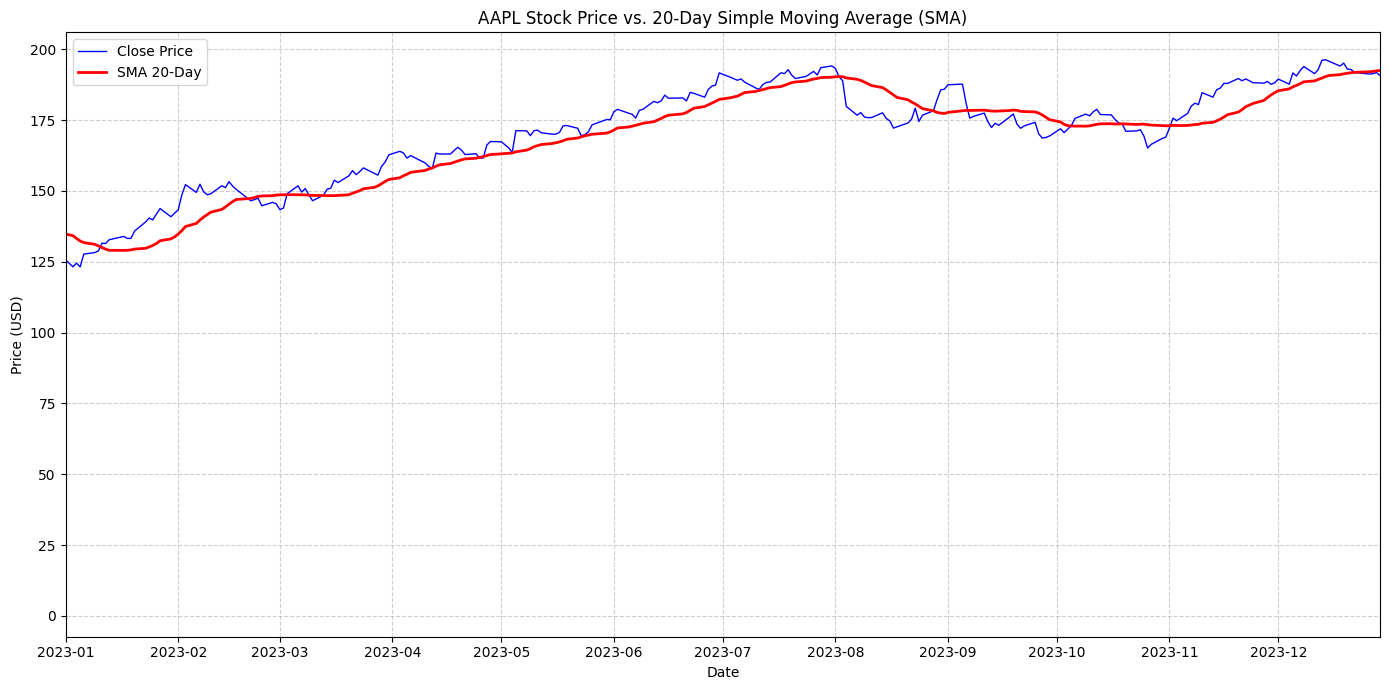

In [8]:
# Cell 4: Visualization of Price vs. SMA

import matplotlib.pyplot as plt

# Plot the stock price and the 20-day SMA
plt.figure(figsize=(14, 7))

# Plotting the Close price
plt.plot(aapl_df.index, aapl_df['Close'], label='Close Price', color='blue', linewidth=1)

# Plotting the SMA_20
plt.plot(aapl_df.index, aapl_df['SMA_20'], label='SMA 20-Day', color='red', linewidth=2)

# Add titles and labels
plt.title('AAPL Stock Price vs. 20-Day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Restrict the view to the last year for better detail
# You can change the start date to see the whole history
start_date = '2023-01-01'
plt.xlim(pd.to_datetime(start_date), aapl_df.index.max())

plt.tight_layout()
plt.show()

In [9]:
#  Calculate Daily Returns (Financial Metric)

# Daily returns are calculated as the percentage change in the Close price from the previous day.
aapl_df['Daily_Return'] = aapl_df['Close'].pct_change() * 100

# Display the successful calculation
print("Daily Returns Calculated Successfully!")
print("\nDataFrame Tail (showing Daily_Return):")
print(aapl_df.tail())

Daily Returns Calculated Successfully!

DataFrame Tail (showing Daily_Return):
                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600   
2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300   
2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700   
2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900   
2023-12-29  190.728775  192.581275  189.936256  192.085953  42672100   

                SMA_20     RSI_14      MACD  MACD_Signal  MACD_Hist  \
Date                                                                  
2023-12-22  191.856618  54.672784  2.633141     3.235256  -0.602115   
2023-12-26  192.018094  53.090049  2.304751     3.049155  -0.744404   
2023-12-27  192.154308  53.354446  2.029104     2.845145  -0.816041   
2023-12-28  192.362839  54.540999  1.823998     2.640915  -0.

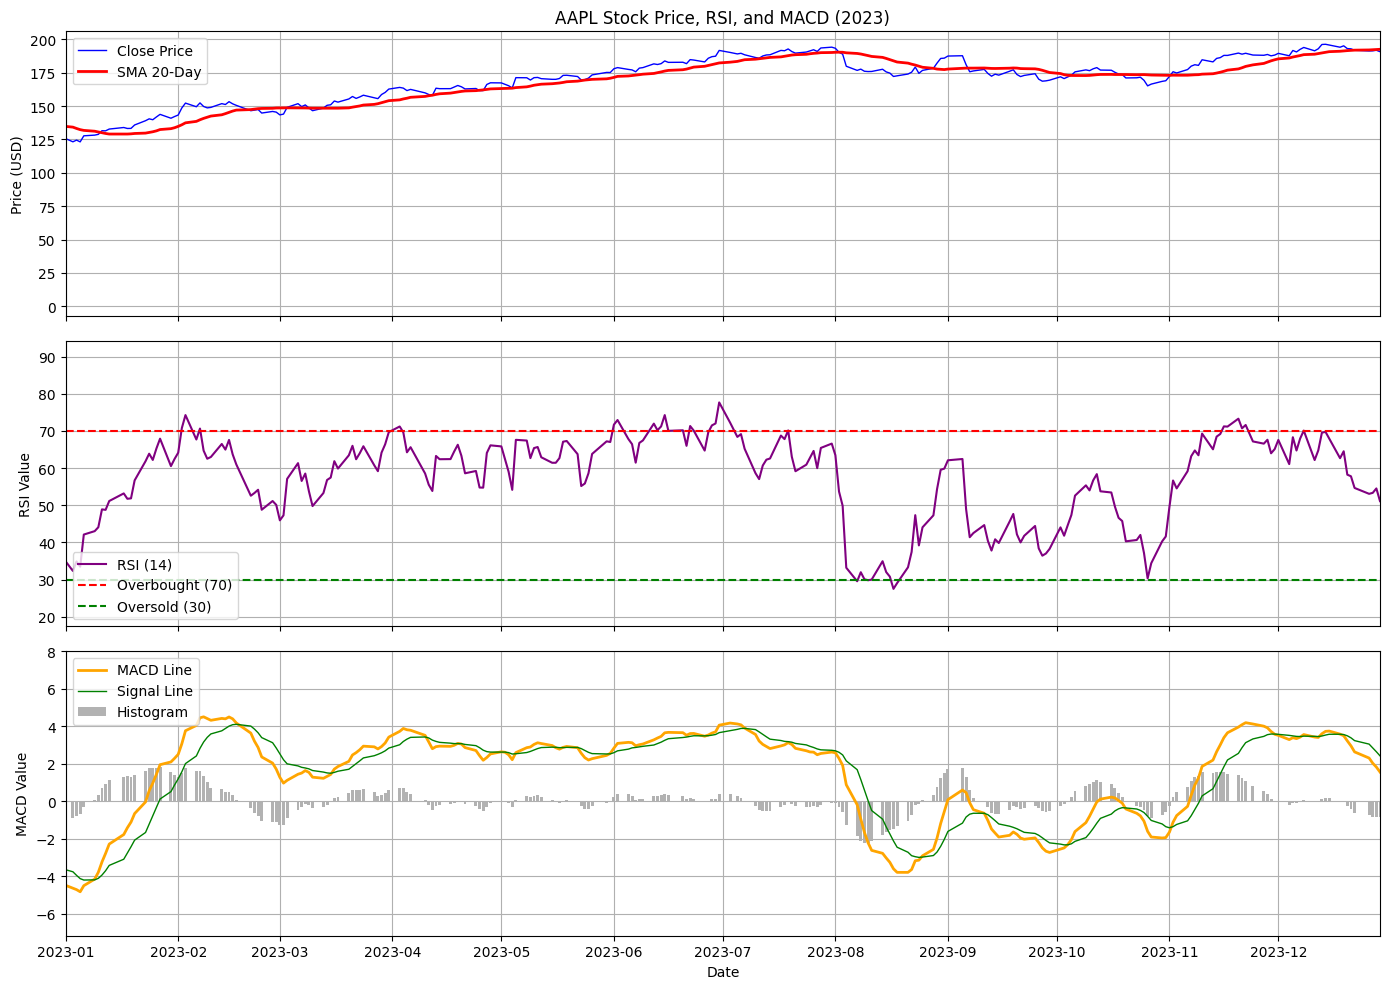

In [10]:
# Cell 6: Visualization of Momentum Indicators (RSI and MACD)

# Create a figure with three subplots (stacked vertically)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# --- 1. Price Plot (Top Panel) ---
ax1.plot(aapl_df.index, aapl_df['Close'], label='Close Price', color='blue', linewidth=1)
ax1.plot(aapl_df.index, aapl_df['SMA_20'], label='SMA 20-Day', color='red', linewidth=2)
ax1.set_title('AAPL Stock Price, RSI, and MACD (2023)')
ax1.set_ylabel('Price (USD)')
ax1.legend(loc='upper left')
ax1.grid(True)

# --- 2. RSI Plot (Middle Panel) ---
ax2.plot(aapl_df.index, aapl_df['RSI_14'], label='RSI (14)', color='purple', linewidth=1.5)
ax2.axhline(70, linestyle='--', color='red', label='Overbought (70)')
ax2.axhline(30, linestyle='--', color='green', label='Oversold (30)')
ax2.set_ylabel('RSI Value')
ax2.legend(loc='lower left')
ax2.grid(True)

# --- 3. MACD Plot (Bottom Panel) ---
ax3.plot(aapl_df.index, aapl_df['MACD'], label='MACD Line', color='orange', linewidth=2)
ax3.plot(aapl_df.index, aapl_df['MACD_Signal'], label='Signal Line', color='green', linewidth=1)
ax3.bar(aapl_df.index, aapl_df['MACD_Hist'], label='Histogram', color='gray', alpha=0.6)
ax3.set_ylabel('MACD Value')
ax3.set_xlabel('Date')
ax3.legend(loc='upper left')
ax3.grid(True)

# Restrict the view to the last year for consistency
start_date = '2023-01-01'
ax3.set_xlim(pd.to_datetime(start_date), aapl_df.index.max())

plt.tight_layout()
plt.show()

In [11]:
#  Calculate Bollinger Bands (BBANDS)

# Standard BBANDS use a 20-day period and 2 standard deviations (nbdev=2)
aapl_df['BB_Upper'], aapl_df['BB_Middle'], aapl_df['BB_Lower'] = talib.BBANDS(
    aapl_df['Close'], 
    timeperiod=20, 
    nbdevup=2, 
    nbdevdn=2, 
    matype=0  # 0 = Simple Moving Average (SMA)
)

# --- Display Results ---
print("Bollinger Bands Calculated Successfully!")
print("\nDataFrame Tail (showing BBANDS):")
print(aapl_df[['Close', 'BB_Upper', 'BB_Middle', 'BB_Lower']].tail())

Bollinger Bands Calculated Successfully!

DataFrame Tail (showing BBANDS):
                 Close    BB_Upper   BB_Middle    BB_Lower
Date                                                      
2023-12-22  191.788757  197.478146  191.856618  186.235090
2023-12-26  191.243912  197.367843  192.018094  186.668345
2023-12-27  191.342972  197.285152  192.154308  187.023465
2023-12-28  191.768951  197.056446  192.362839  187.669231
2023-12-29  190.728775  196.848102  192.490633  188.133164


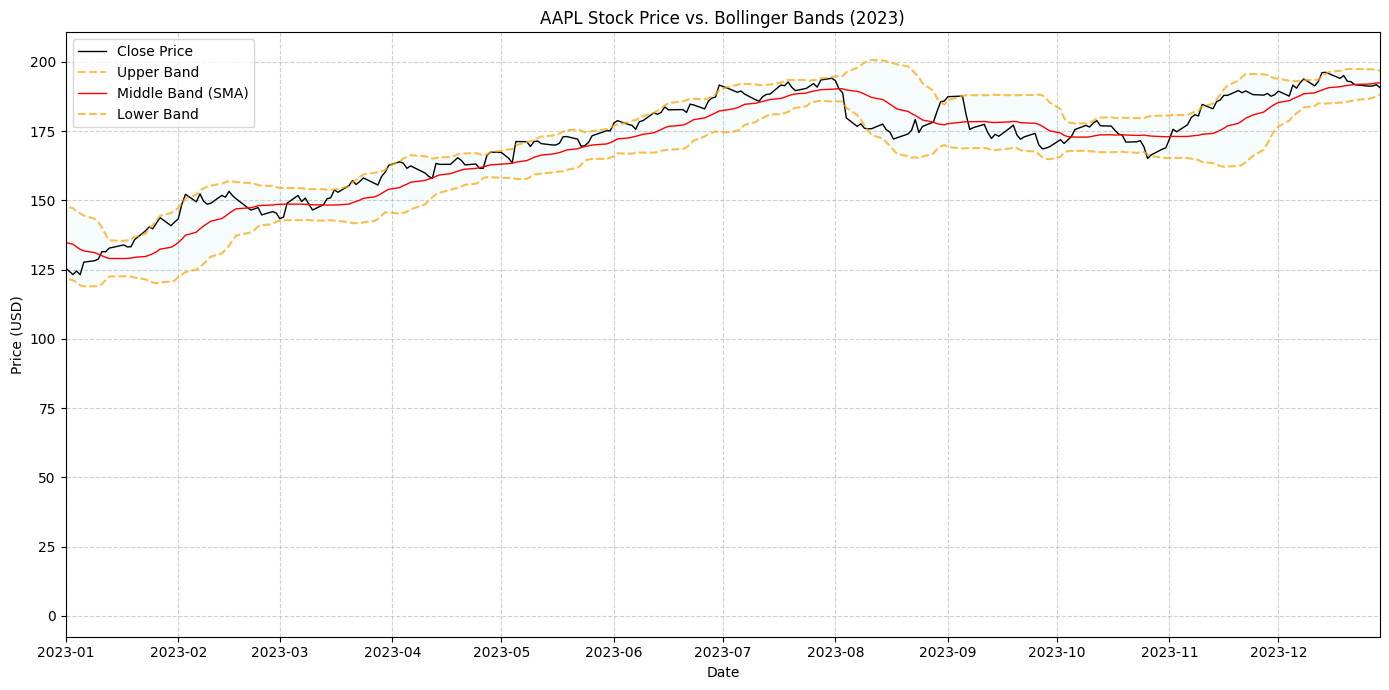

In [12]:
# Cell 8: Visualization of Price vs. Bollinger Bands

plt.figure(figsize=(14, 7))

# Plotting the Close price
plt.plot(aapl_df.index, aapl_df['Close'], label='Close Price', color='black', linewidth=1)

# Plotting the Bollinger Bands
plt.plot(aapl_df.index, aapl_df['BB_Upper'], label='Upper Band', color='orange', linestyle='--', alpha=0.7)
plt.plot(aapl_df.index, aapl_df['BB_Middle'], label='Middle Band (SMA)', color='red', linewidth=1)
plt.plot(aapl_df.index, aapl_df['BB_Lower'], label='Lower Band', color='orange', linestyle='--', alpha=0.7)

# Fill the area between the bands for better visualization
plt.fill_between(aapl_df.index, aapl_df['BB_Upper'], aapl_df['BB_Lower'], alpha=0.1, color='lightblue')

# Add titles and labels
plt.title('AAPL Stock Price vs. Bollinger Bands (2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Restrict the view to the last year for better detail
start_date = '2023-01-01'
plt.xlim(pd.to_datetime(start_date), aapl_df.index.max())

plt.tight_layout()
plt.show()

In [14]:
#  Create a Reusable Analysis Function

def analyze_stock_data(file_name):
    """Loads a stock CSV, calculates all technical indicators, and returns the DataFrame."""
    
    # 1. Path Definition (using the robust path logic you fixed)
    base_dir = Path.cwd().parent 
    file_path = base_dir / 'data' / 'yfinance_data' / file_name

    print(f"--- Starting analysis for: {file_name.replace('.csv', '')} ---")
    
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path}")
        return None

    # 2. Data Preparation
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # 3. Financial Metric
    df['Daily_Return'] = df['Close'].pct_change() * 100
    
    # 4. Technical Indicators (TA-Lib)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    print("Indicators calculated successfully.")
    return df

In [15]:
#  Run Analysis on All Stock Files

# List of all files to process
stock_files = ['AAPL.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv']

# Dictionary to store the resulting DataFrames
analyzed_stocks = {}

for stock_file in stock_files:
    stock_ticker = stock_file.replace('.csv', '')
    df_analyzed = analyze_stock_data(stock_file)
    
    if df_analyzed is not None:
        analyzed_stocks[stock_ticker] = df_analyzed
        print(f"{stock_ticker} data stored. Final columns: {list(df_analyzed.columns)}")

print("\n--- All Stock Analysis Complete ---")
print(f"Total stocks analyzed: {len(analyzed_stocks)}")

--- Starting analysis for: AAPL ---
Indicators calculated successfully.
AAPL data stored. Final columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'SMA_20', 'RSI_14', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'MACD', 'MACD_Signal', 'MACD_Hist']
--- Starting analysis for: AMZN ---
Indicators calculated successfully.
AMZN data stored. Final columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'SMA_20', 'RSI_14', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'MACD', 'MACD_Signal', 'MACD_Hist']
--- Starting analysis for: GOOG ---
Indicators calculated successfully.
GOOG data stored. Final columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'SMA_20', 'RSI_14', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'MACD', 'MACD_Signal', 'MACD_Hist']
--- Starting analysis for: META ---
Indicators calculated successfully.
META data stored. Final columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'SMA_20', 'RSI_14', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'MACD', 